In [3]:
%cd outputs

/home/sihang/workspace/traffic_proj/outputs


In [19]:
import json
from matplotlib import pyplot as plt
import math

In [20]:
alpha_dict = json.load(open('alpha_results.json', 'r'))
precision_dict = json.load(open('precision_results.json', 'r'))

n_networks = len(alpha_dict)

In [21]:
alpha_dict

{'EMA': [{'total_time': 28678.31196209787,
   'iteration': 9,
   'alpha': 0.2,
   'converged': True,
   'precision': 0.001},
  {'total_time': 28678.31196209787,
   'iteration': 9,
   'alpha': 0.3,
   'converged': True,
   'precision': 0.001},
  {'total_time': 28678.31196209787,
   'iteration': 9,
   'alpha': 0.4,
   'converged': True,
   'precision': 0.001},
  {'total_time': 28678.31196209787,
   'iteration': 9,
   'alpha': 0.1,
   'converged': True,
   'precision': 0.001},
  {'total_time': 28678.31196209787,
   'iteration': 9,
   'alpha': 0.5,
   'converged': True,
   'precision': 0.001}],
 'Braess': [{'total_time': 551.2224000798001,
   'iteration': 101,
   'alpha': 0.2,
   'converged': False,
   'precision': 0.001},
  {'total_time': 551.2224000798001,
   'iteration': 101,
   'alpha': 0.3,
   'converged': False,
   'precision': 0.001},
  {'total_time': 551.2224000798001,
   'iteration': 101,
   'alpha': 0.4,
   'converged': False,
   'precision': 0.001},
  {'total_time': 551.22240007

In [22]:
def time_against_alpha(alpha_dict) -> None:
    temp_dict = {net: [(trip['alpha'], trip['total_time']) for trip in trips] for net, trips in alpha_dict.items()}
    '''
    create n_networks subplots, each ploting time against alpha
    '''

    for net, trips in temp_dict.items():
        '''
        plot the normalized time against alpha, using a different color for each network
        '''
        my_trips = sorted(trips, key=lambda x: x[0])
        max_time = max([trip[1] for trip in trips])
        normalized_time = [trip[1] / max_time for trip in my_trips]
        alphas = [trip[0] for trip in my_trips]
        plt.plot(alphas, normalized_time, label=net)
    
    plt.xlabel('alpha')
    plt.ylabel('normalized time')
    plt.tight_layout()
    plt.legend()
    plt.show()

In [23]:
def time_against_precision(precision_dict) -> None:
    temp_dict = {net: [(trip['precision'], trip['total_time']) for trip in trips] for net, trips in precision_dict.items()}
    '''
    create n_networks subplots, each ploting time against precision
    '''
    
    for net, trips in temp_dict.items():
        '''
        plot the normalized time against alpha, using a different color for each network
        '''

        my_trips = sorted(trips, key=lambda x: x[0])
        max_time = max([trip[1] for trip in trips])
        normalized_time = [trip[1] / max_time for trip in my_trips]
        precisions = [-1 * math.log10(trip[0]) for trip in my_trips]
        plt.plot(precisions, normalized_time, label=net)


    plt.xlabel('precision')
    plt.ylabel('normalized time')
    plt.tight_layout()
    plt.legend()
    plt.show()
    

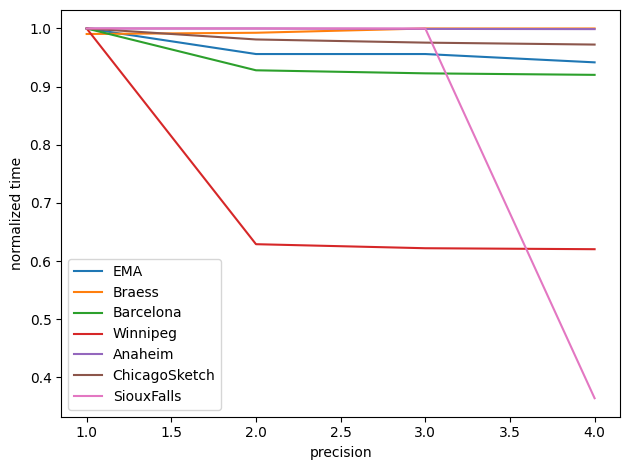

In [24]:
time_against_precision(precision_dict)

In [25]:
def iterations_against_precision(alpha_dict) -> None:
    temp_dict = {net: [(trip['precision'], trip['iteration']) for trip in trips] for net, trips in alpha_dict.items()}
    '''
    create n_networks subplots, each ploting time against alpha
    '''

    for net, trips in temp_dict.items():
        '''
        plot the normalized time against alpha, using a different color for each network
        '''
        my_trips = sorted(trips, key=lambda x: x[0])
        precisions = [-1 * math.log10(trip[0]) for trip in my_trips]
        iterations = [trip[1] for trip in my_trips]
        plt.plot(precisions, iterations, label=net)

    plt.xlabel('precision')
    plt.ylabel('iterations')
    plt.tight_layout()
    plt.legend()
    plt.show()

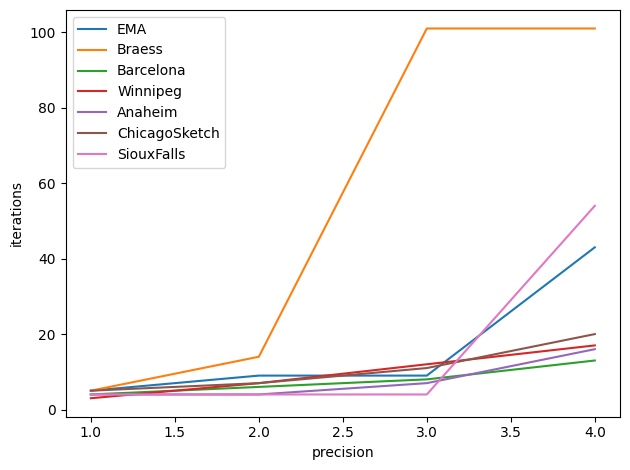

In [26]:
iterations_against_precision(precision_dict)